In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from scipy.stats import shapiro
from scipy.stats import levene
from sklearn.datasets import load_iris
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
target_df = pd.DataFrame(data=iris.target, columns=['target'])
target_df.head(3)

,target
0,0
1,0
2,0


In [5]:
df = pd.concat([iris_df, target_df], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


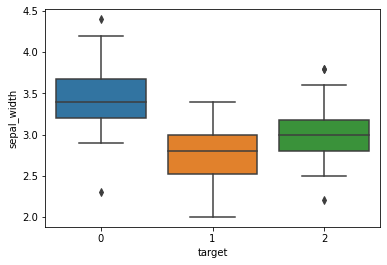

In [8]:
sns.boxplot(x='target', y='sepal_width', data=df)
plt.show()

# 일원 분산분석 (One-way ANOVA)
* 귀무가설 : 집단(target) 간의 sepal_width 차이가 없다.
* 대립가설 : 집단(target) 간의 sepal_width 차이가 있다.

### 정규성 검정
* 귀무가설 : 정규분포를 따른다.
* 대립가설 : 정규분포를 따르지 않는다.

In [9]:
print(shapiro(df.sepal_width[df.target==0]))
print(shapiro(df.sepal_width[df.target==1]))
print(shapiro(df.sepal_width[df.target==2]))

(0.97171950340271, 0.2715264856815338)
(0.9741330742835999, 0.33798879384994507)
(0.9673910140991211, 0.1809043288230896)


### 등분산성 검정
* 귀무가설 : 등분산성을 만족한다.
* 대립가설 : 등분산성을 만족하지 않는다. (이분산이다.)

In [14]:
print(levene(df.sepal_width[df.target==0], df.sepal_width[df.target==1], df.sepal_width[df.target==2]))

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)


# 일원 분산분석 (One-way ANOVA)
* 귀무가설 : 집단(target) 간의 sepal_width 차이가 없다.
* 대립가설 : 집단(target) 간의 sepal_width 차이가 있다.

In [15]:
stats.f_oneway(df.sepal_width[df.target==0], df.sepal_width[df.target==1], df.sepal_width[df.target==2])

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

### 결론
* 귀무가설 기각, 대립가설 채택
* 집단(target) 간의 sepal_width 차이가 있다.

### 사후분석 (Post-hoc)
* 구체적으로 어떤 차이가 나는지 검증하는 방법
* Family Wise Error Rate
  * 하나의 가설에서 1종 오류가 발생할 가능성
  * 가설 검정을 많이 할 수록 FWER은 증가

In [16]:
hsd = pairwise_tukeyhsd(df['sepal_width'], df['target'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.658,0.001,-0.8189,-0.4971,True
0,2,-0.454,0.001,-0.6149,-0.2931,True
1,2,0.204,0.0088,0.0431,0.3649,True
